In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [2]:
# load data

lap_price = pd.read_csv('laptop_data.csv')

In [3]:
lap_price.keys()

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
lap_price.shape

(1303, 12)

In [5]:
lap_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# check summary statistics of all numerical columns -> 

lap_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1303.0,651.000000,376.288010,0.00,325.50,651.00,976.5000,1302.00
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [7]:
# check the count of features/ non-null values in each column -> 

lap_price.count()

Unnamed: 0          1303
Company             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price               1303
dtype: int64

In [8]:
lap_price.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [9]:
lap_price.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
lap_price.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [11]:
# Let's replace the empty strings with NaN values

lap_price = lap_price.replace(' ', np.nan)

In [12]:
# Let's replace the question marks (?) with NaN values

lap_price = lap_price.replace('?', np.nan)

In [13]:
# Let's replace the question marks (.) with NaN values

lap_price = lap_price.replace('.', np.nan)

In [14]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

lap_price.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

Text(0.5, 1.0, 'Cardinality')

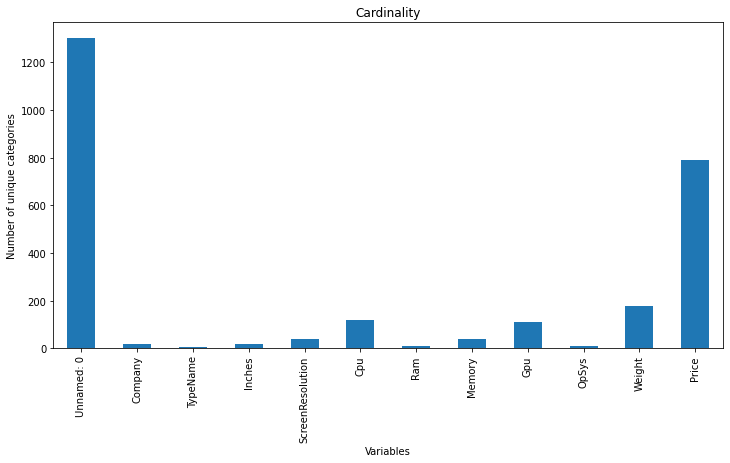

In [15]:
# plot the cardinality:

lap_price.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [15]:
# display categorical features/columns -> 

categorical_columns = lap_price.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [16]:
# display numerical features/columns -> 

numerical_columns = lap_price.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Unnamed: 0', 'Inches', 'Price'], dtype='object')

In [17]:
# check for duplicate rows in the dataset -> 

lap_price.duplicated().sum()

0

In [18]:
# check missing values -> 

lap_price.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [19]:
# print names or check all columns which have null values -> 

[val for val in lap_price.columns if lap_price[val].isnull().sum() > 0]

[]

In [20]:
lap_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


<AxesSubplot:xlabel='Inches'>

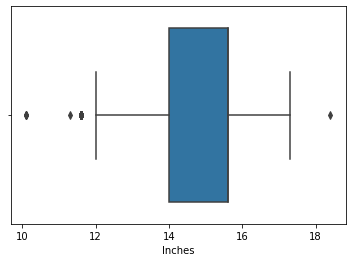

In [22]:
sns.boxplot(x=lap_price['Inches'], data=lap_price)

In [21]:
# Checking correlation - how features are correlated

lap_price.corr()

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


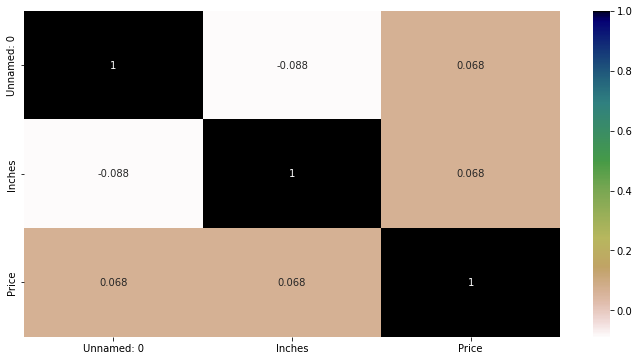

In [22]:
# then plot the correlation of the top most correlated features:

plt.figure(figsize=(12,6))
e = lap_price.corr()
top_correlated_features = e.index
g = sns.heatmap(lap_price[top_correlated_features].corr(), annot=True, cmap='gist_earth_r')

        Observation: Price is highly correlated to inches

                                                                Perform EDA

In [23]:
#1
lap_price.Company.nunique()

19

In [42]:
top_5_most_used_laptops = lap_price.Company.value_counts()[:5]
top_5_most_used_laptops

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Name: Company, dtype: int64

In [46]:
top_5 = px.bar(
    lap_price.Company.value_counts()[:5]
)

In [47]:
top_5

In [69]:
most_used_laptops = lap_price.Company.value_counts().reset_index()
most_used_laptops.rename(columns={'index':'Type of Laptop','Company':'Count of Laptops'}, inplace=True)
most_used_laptops

,index,Company
0,Dell,297
1,Lenovo,297
2,HP,274
3,Asus,158
4,Acer,103
5,MSI,54
6,Toshiba,48
7,Apple,21
8,Samsung,9
9,Razer,7


In [25]:
lap_price.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [31]:
fig = px.bar(
    lap_price.Company.value_counts()
)
fig

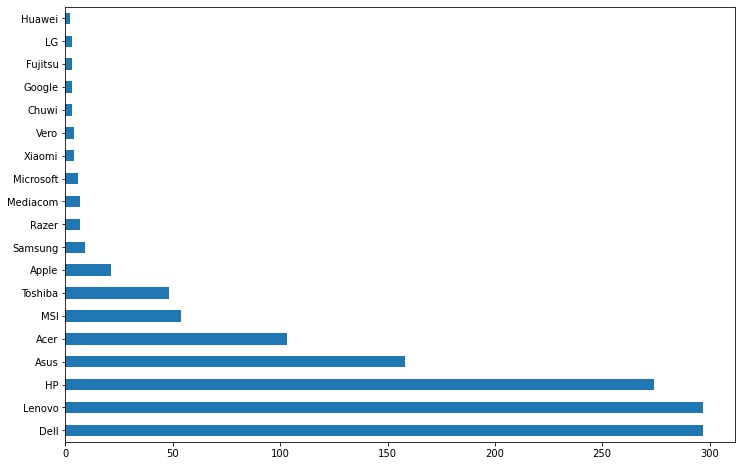

In [26]:
plt.figure(figsize=(12,8))

fig = lap_price.Company.value_counts().plot(
    kind='barh'
)
plt.show()

        Observation: Dell and Lenovo are the most used laptops followed by HP and Asus

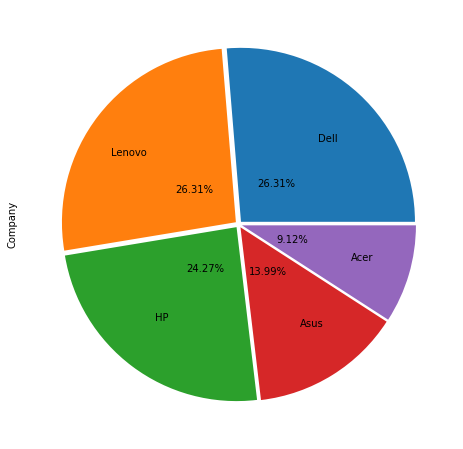

In [154]:
plt.figure(figsize=(12,8))

lap_price.Company.value_counts()[:5].plot(
    kind='pie', explode=[0.02,0.02,0.02,0.02,0.02], autopct='%.2f%%' ,pctdistance=0.3, labeldistance=0.65
)
plt.show()

        Observation: Top 5 laptops:
                1) Lenovo
                2) Dell
                3) HP
                4) Asus
                5) Acer

In [44]:
lap_price['TypeName'].nunique()

6

In [45]:
lap_price['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
plt.pie

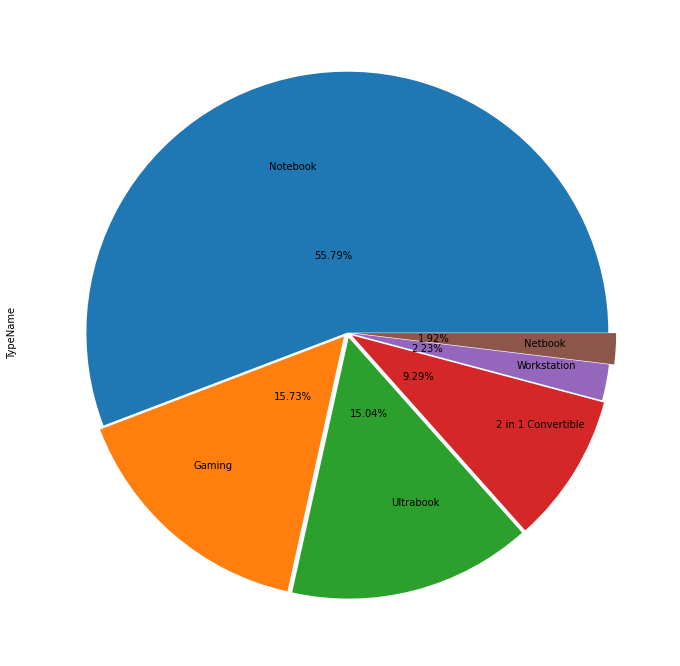

In [156]:
plt.figure(figsize=(12,12))

lap_price['TypeName'].value_counts().plot(
    kind='pie', explode=[0.00001,0.02,0.02,0.02,0.01,0.03], autopct='%.2f%%' ,pctdistance=0.3, labeldistance=0.65
)
plt.show()

In [73]:
lap_price.Inches.nunique()

18

In [74]:
laptops_inches = lap_price.Inches.value_counts().reset_index()
laptops_inches.rename(columns={'index':'inches','Inches':'Count of Laptops'}, inplace=True)

In [75]:
lap_price.Inches.unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

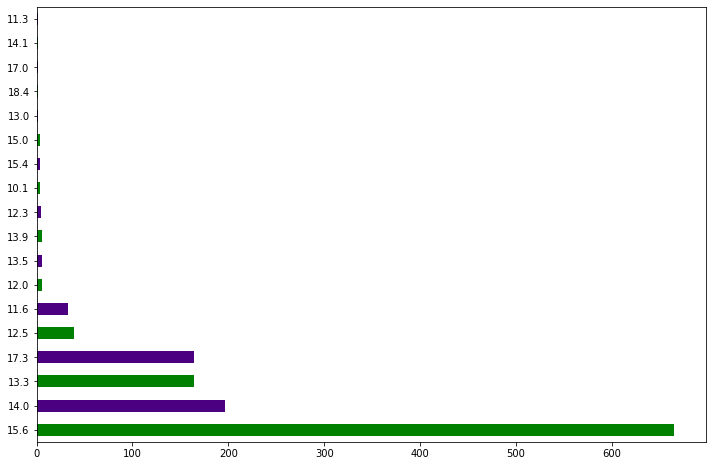

In [77]:
plt.figure(figsize=(12,8))

lap_price.Inches.value_counts().plot(
    kind='barh', color=['green', 'indigo']
)
plt.show()

        Observation: 15.6 inch laptops are most common

In [84]:
lap_price.ScreenResolution.nunique()

40

In [94]:
laptops_ScreenResolution = lap_price.ScreenResolution.value_counts().reset_index()
laptops_ScreenResolution.rename(columns={'index':'Screen Resolution', 'ScreenResolution':'Count of Laptops'}, inplace=True)

In [85]:
lap_price.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [96]:
fig =px.bar(lap_price.ScreenResolution.value_counts())
fig

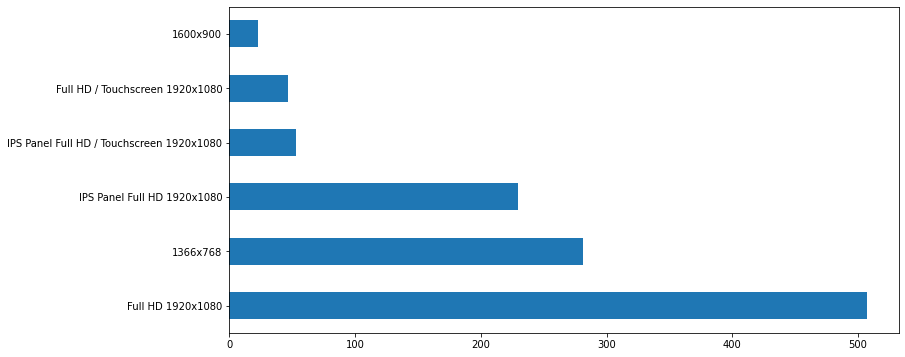

In [153]:
plt.figure(figsize=(12,6))
lap_price.ScreenResolution.value_counts()[:6].plot(
    kind='barh'
)
plt.show()

        Observation: 
                1) Full HD 1920*1080 is the most used screen resolution in laptops
                2) 1366*768 is the second most used screen resolution in laptops
                3) IPS Panel Full HD / Touchscreen 1920x1080 is the third most used screen resolution in laptops

In [87]:
lap_price.Cpu.nunique()

118

In [88]:
lap_price.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [103]:
fig =px.bar(lap_price.Cpu.value_counts())
fig

In [102]:
cpu = lap_price.Cpu.value_counts().reset_index()
cpu.rename(columns={'index':'Types of CPU', 'Cpu':'Count of Laptops'}, inplace=True)
cpu

,Types of CPU,Count of Laptops
0,Intel Core i5 7200U 2.5GHz,190
1,Intel Core i7 7700HQ 2.8GHz,146
2,Intel Core i7 7500U 2.7GHz,134
3,Intel Core i7 8550U 1.8GHz,73
4,Intel Core i5 8250U 1.6GHz,72
...,...,...
113,Intel Core M M3-6Y30 0.9GHz,1
114,AMD A9-Series 9420 2.9GHz,1
115,Intel Core i3 6006U 2.2GHz,1
116,AMD A6-Series 7310 2GHz,1


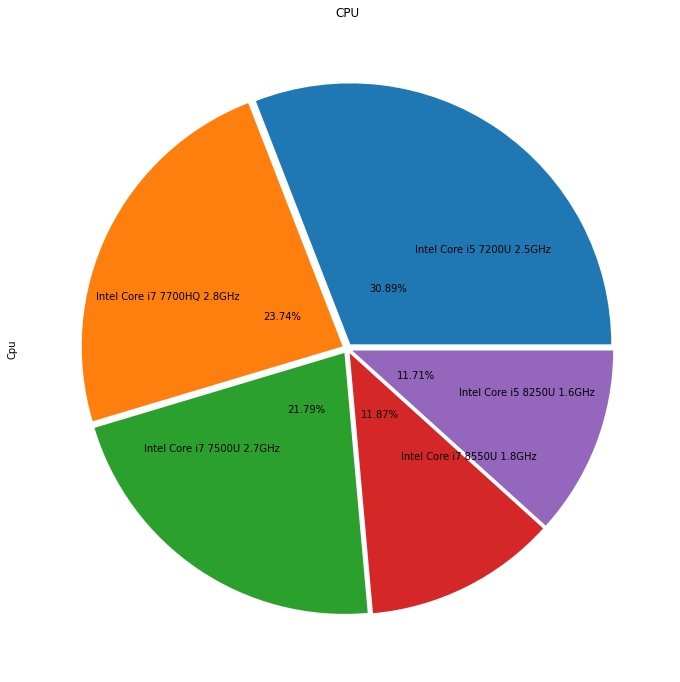

In [157]:
plt.figure(figsize=(12,12))
plt.title('CPU')
lap_price.Cpu.value_counts()[:5].plot(
    kind='pie', explode=[0.02,0.02,0.02,0.02,0.02] ,autopct='%.2f%%', pctdistance=0.26, labeldistance=0.44, textprops={
        'color':'black'
    }
)
plt.show()

        Top 5 CPU's in laptops:
            1) Intel Core i5 7200 2.5 GHZ
            2) Intel Core i7 7700HQ 2.8 GHZ
            3) Intel Core i7 7500U 2.7 GHZ
            4) Intel Core i7 8550U 1.8 GHZ
            5) Intel Core i5 8250U 1.6 GHZ

In [99]:
lap_price.Ram.nunique()

9

In [100]:
lap_price.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [109]:
fig =px.bar(lap_price.Ram.value_counts())
fig

In [108]:
ram = lap_price.Ram.value_counts().reset_index()
ram.rename(columns={'index':'Types of Ram', 'Ram':'Count of Laptops'}, inplace=True)
ram

,Types of Ram,Count of Laptops
0,8GB,619
1,4GB,375
2,16GB,200
3,6GB,41
4,12GB,25
5,2GB,22
6,32GB,17
7,24GB,3
8,64GB,1


<AxesSubplot:>

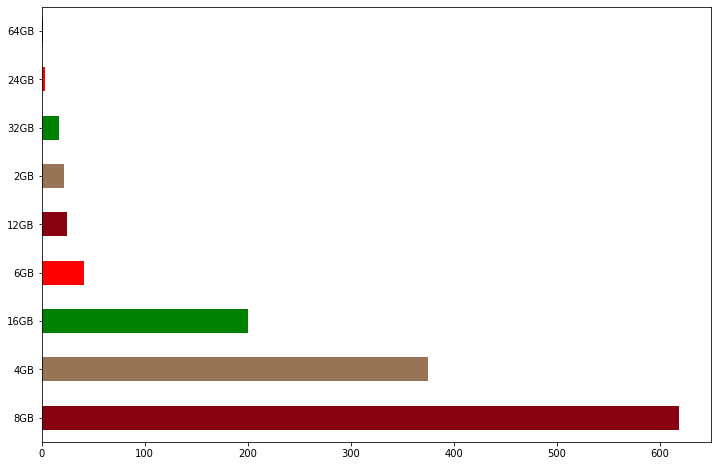

In [106]:
plt.figure(figsize=(12,8))

lap_price.Ram.value_counts().plot(
    kind='barh', color=['#870111', '#987456', 'green', 'red']
)

        Observation:
                    1) 8GB is the most used Ram in Laptops
                    2) 2GB is the second most used Ram in Laptops
                    3) 64GB is the least used Ram in Laptops

In [108]:
lap_price.Memory.nunique()

39

In [109]:
lap_price.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [112]:
memory = lap_price.Memory.value_counts().reset_index()
memory.rename(columns={'index':'Types of Memory', 'Memory':'Count of Laptops'}, inplace=True)
memory

,Types of Memory,Count of Laptops
0,256GB SSD,412
1,1TB HDD,223
2,500GB HDD,132
3,512GB SSD,118
4,128GB SSD + 1TB HDD,94
5,128GB SSD,76
6,256GB SSD + 1TB HDD,73
7,32GB Flash Storage,38
8,2TB HDD,16
9,64GB Flash Storage,15


In [113]:
px.bar(lap_price.Memory.value_counts())

<AxesSubplot:title={'center':'Memory'}, ylabel='Memory'>

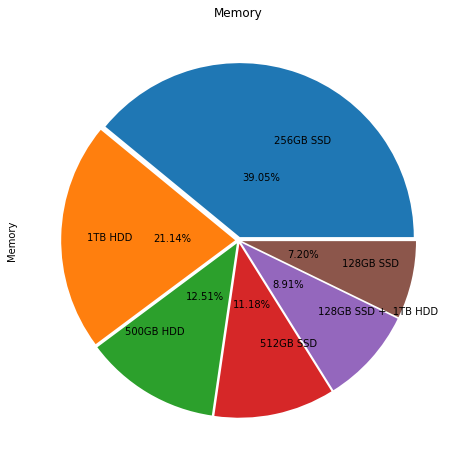

In [118]:
plt.figure(figsize=(12,8))
plt.title('Memory')
lap_price.Memory.value_counts()[:6].plot(
    kind='pie', explode=[0.02,0.02,0.02,0.02,0.02,0.02] ,autopct='%.2f%%', pctdistance=0.36, labeldistance=0.59, textprops={
        'color':'black'
    }
)

        Observation:
                    1) 256GB SSD is most used Memory
                    2) 1TB HDD is the second most used
                    3) 500GB HDD is the third most used

In [128]:
lap_price.Gpu.nunique()

110

In [129]:
lap_price.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [117]:
gpu = lap_price.Gpu.value_counts().reset_index()
gpu.rename(columns={'index':'Types of Gpu\'s', 'Gpu':'Count of Laptops'}, inplace=True)
gpu

,Types of Gpu's,Count of Laptops
0,Intel HD Graphics 620,281
1,Intel HD Graphics 520,185
2,Intel UHD Graphics 620,68
3,Nvidia GeForce GTX 1050,66
4,Nvidia GeForce GTX 1060,48
...,...,...
105,AMD Radeon R5 520,1
106,AMD Radeon R7,1
107,Intel HD Graphics 540,1
108,AMD Radeon 540,1


In [118]:
px.bar(lap_price.Gpu.value_counts())

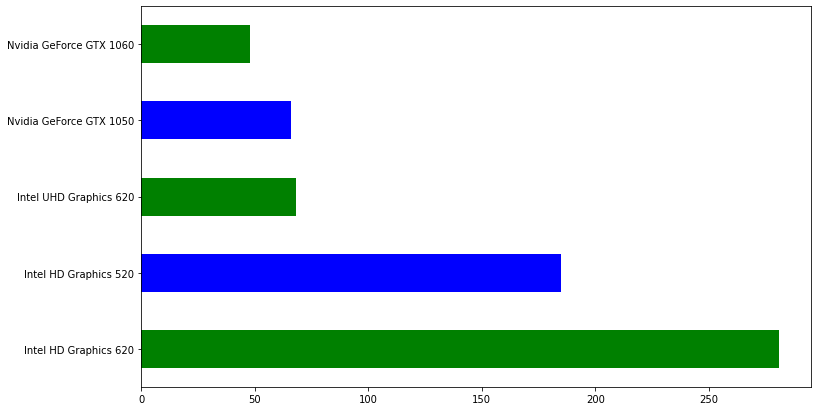

In [159]:
plt.figure(figsize=(12,7))
lap_price.Gpu.value_counts()[:5].plot(
    kind='barh', color=['green', 'blue']
)
plt.show()

        Observation:
                    1) Intel HD Graphics 620 is most used GPU
                    2) Intel HD Graphics 520 is the second most used GPU
                    3) Intel UHD Graphics 620 is the third most used GPU
                    4) Nvidia GeForce GTX 1050 is the fourth most used GPU
                    5) Nvidia GeForce GTX 1060 is the fourth most used GPU

In [136]:
lap_price.OpSys.nunique()

9

In [137]:
lap_price.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [122]:
os = lap_price.OpSys.value_counts().reset_index()
os.rename(columns={'index':'Types of Operating Systems', 'OpSys':'Count of Laptops'}, inplace=True)
os

,Types of Operating Systems,Count of Laptops
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


In [123]:
px.bar(lap_price.OpSys.value_counts())

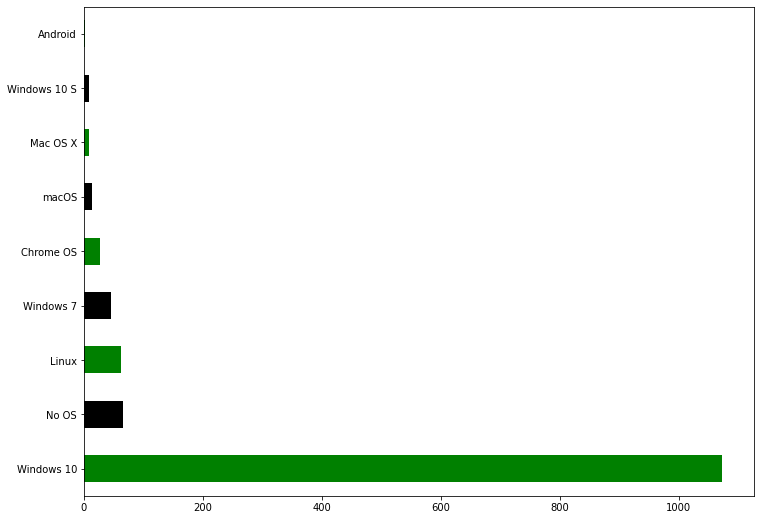

In [141]:
plt.figure(figsize=(12,9))

lap_price.OpSys.value_counts().plot(
    kind='barh', color=[
        'green', 'black'
    ]
)
plt.show()

        Observation:
                    1) Windows 10 is the most common OpSys used
                    2) No OS is the second most common OpSys used
                    3) Android is the least common OpSys used

In [143]:
lap_price.Weight.nunique()

179

In [144]:
lap_price.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [126]:
weight = lap_price.Weight.value_counts().reset_index()
weight.rename(columns={'index':'Weight', 'Weight':'Count of Laptops'}, inplace=True)
weight

,Weight,Count of Laptops
0,2.2kg,121
1,2.1kg,58
2,2.4kg,44
3,2.3kg,41
4,2.5kg,38
...,...,...
174,3.25kg,1
175,4.7kg,1
176,1.55kg,1
177,1.18kg,1


In [127]:
px.bar(lap_price.Weight.value_counts())

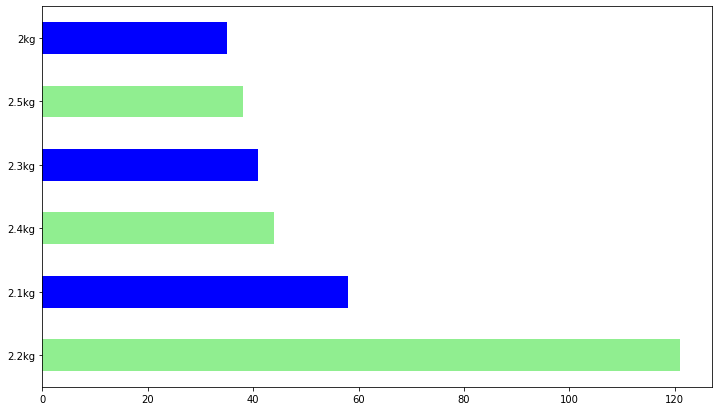

In [163]:
plt.figure(figsize=(12,7))
lap_price.Weight.value_counts()[:6].plot(
    kind='barh', color=['lightgreen','blue']
)
plt.show()

        Observation:
                1) 2.2kg weight of laptops is most common
                2) 2.1kg weight of laptops is the second most common
                3) 2.4kg weight of laptops is the third most common

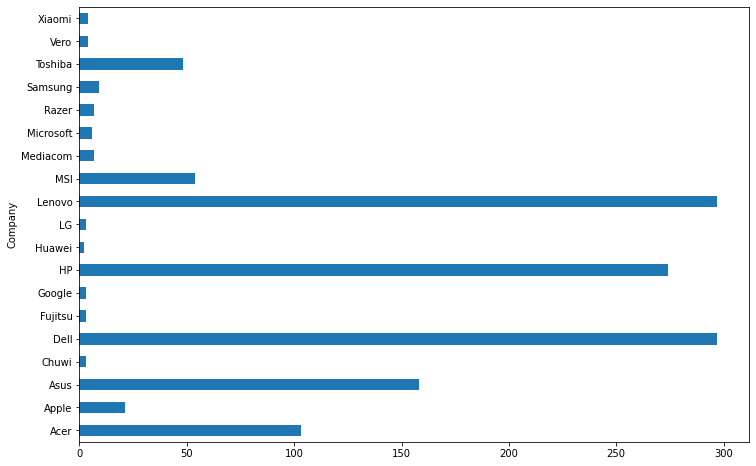

In [184]:
plt.figure(figsize=(12,8))

lap_price.groupby(['Company'])['TypeName'].size().plot(
    kind='barh'
)
plt.show()

        Observation:
                1) Dell and Lenovo are the most common companies with many Typename laptops
                2) HP company comes in third with many Typename laptops

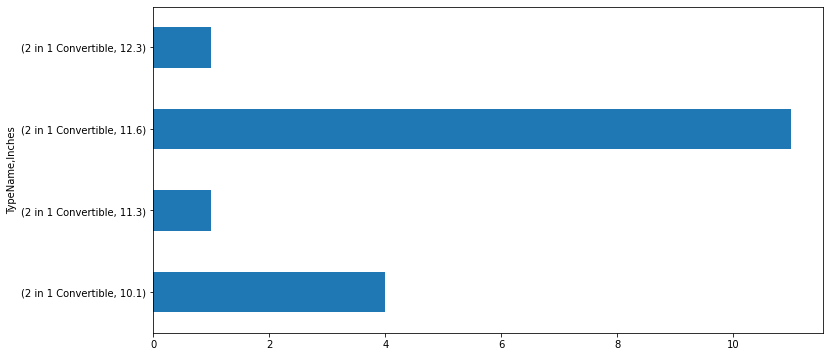

In [185]:
plt.figure(figsize=(12,6))
lap_price.groupby(['TypeName','Inches']).size()[:4].plot(
    kind='barh'
)
plt.show()

        Observation: Typename 2 in 1 Convertible and 11.6 inch laptops are most common

<AxesSubplot:ylabel='Company,Inches'>

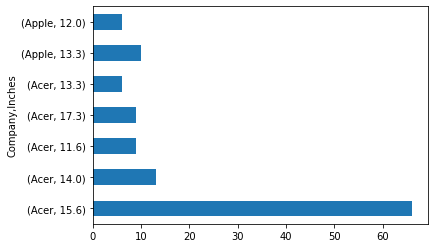

In [190]:
lap_price.groupby(['Company'])['Inches'].value_counts()[:7].plot(
    kind='barh'
)

        Observation: Company Acer had the most laptops produced of 15.6 inches

<AxesSubplot:ylabel='TypeName,ScreenResolution'>

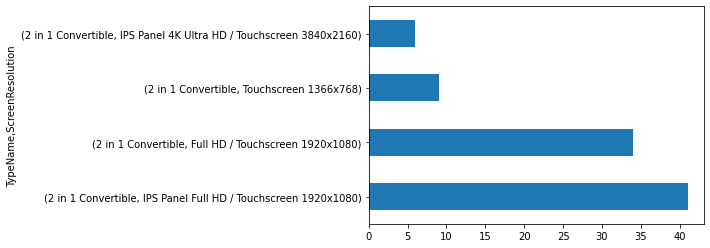

In [194]:
lap_price.groupby(['TypeName'])['ScreenResolution'].value_counts()[:4].plot(
    kind='barh'
)

        Observation: 2 in 1 Convertible Laptops had the most ScreenResolution of IPS Panel Full HD/ Touchscreen 1920*1080

<AxesSubplot:xlabel='Inches', ylabel='Price'>

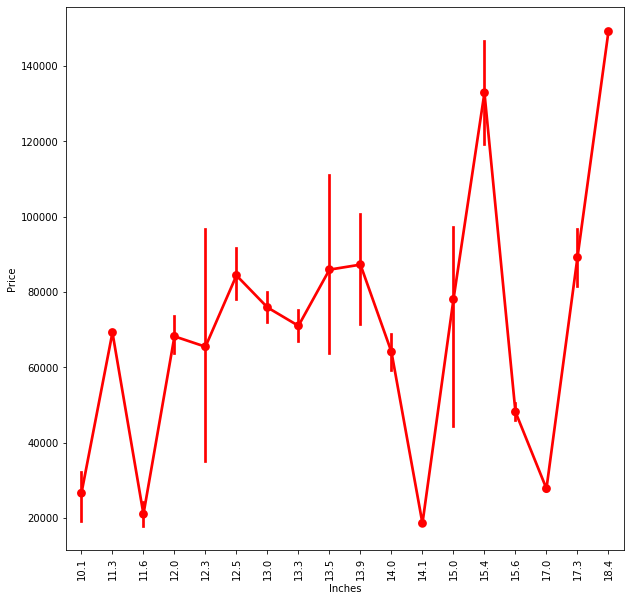

In [199]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.pointplot(x='Inches', y='Price', data=lap_price, color='red')

        Observation: 
                    1) 18.4 inch laptops cost more than any other laptop
                    2) 11.6 inch laptops cost less than any other laptop

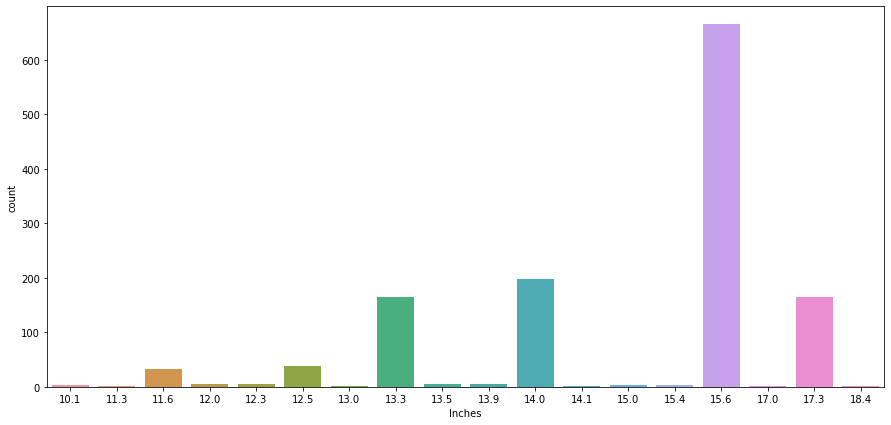

In [206]:
plt.figure(figsize=(15,7))

g = sns.countplot(
    x='Inches',
    data=lap_price,
)

        Observation: 15.6 inch laptops are the most available

In [207]:
lap_price.sample(n=2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
64,64,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,36763.20
989,989,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,59620.32


c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


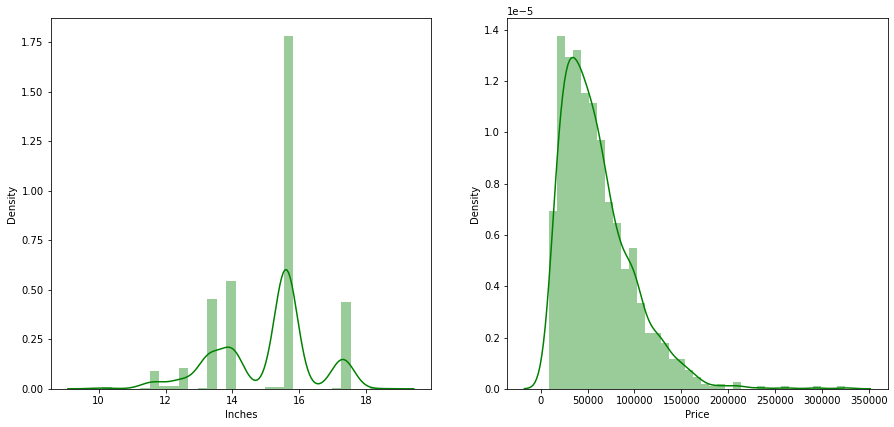

In [218]:
cols = lap_price.columns
pos = 1
plt.figure(figsize=(15,15))

for i in ['Inches','Price']:
    plt.subplot(2,2,pos)
    sns.distplot(lap_price[i], color = 'green')
    pos += 1

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


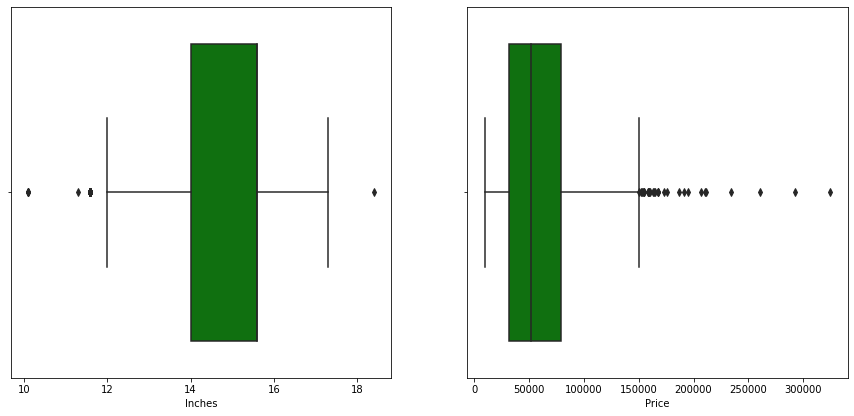

In [219]:
cols = lap_price.columns
pos = 1
plt.figure(figsize=(15,15))

for i in ['Inches','Price']:
    plt.subplot(2,2,pos)
    sns.boxplot(lap_price[i], color = 'green')
    pos += 1

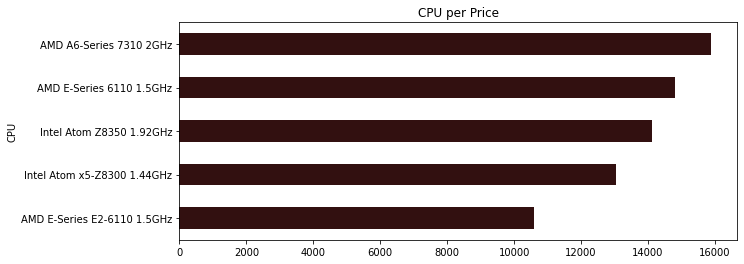

In [227]:
lap_price.groupby('Cpu').sum()['Price'].sort_values(ascending=True)[:5].plot(
    kind='barh',
    color='#321010',
    figsize=(10,4),
    title='CPU per Price',
    xlabel='CPU'
)
plt.show()

        Observation: AMD A6-Series 7310 2GHZ CPU's cost more 

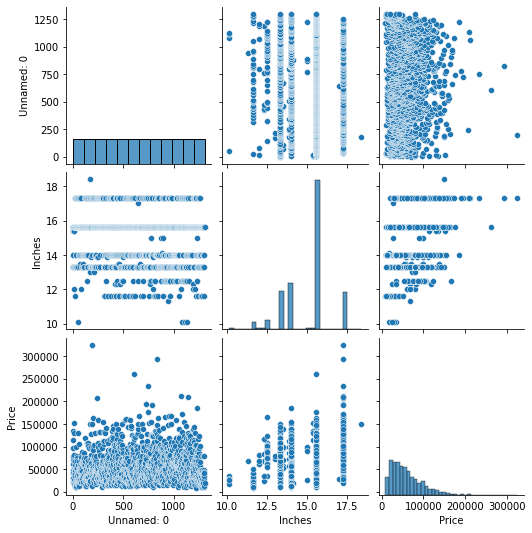

In [230]:
# pairplot of every feature in the dataset

sns.pairplot(lap_price)
plt.show()

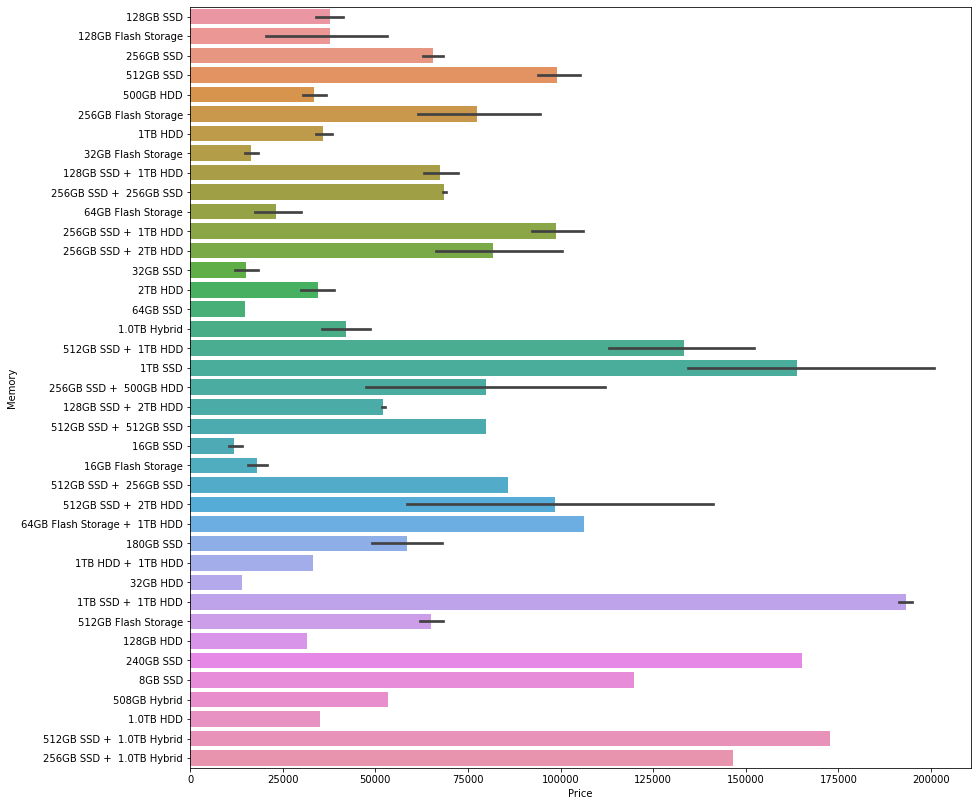

In [236]:
plt.figure(figsize=(14,14))
sns.barplot(x='Price', y='Memory', data=lap_price)
plt.show()

        Observation:
                    1) 1TB HDD SSD + 1TB HDD memory cost more than any other memory
                    2) 512GB SSD + 1.0TB Hybrid memory is the second more expensive memory
                    3) 1TB SSD memory is the third more expensive memory

<AxesSubplot:ylabel='Gpu'>

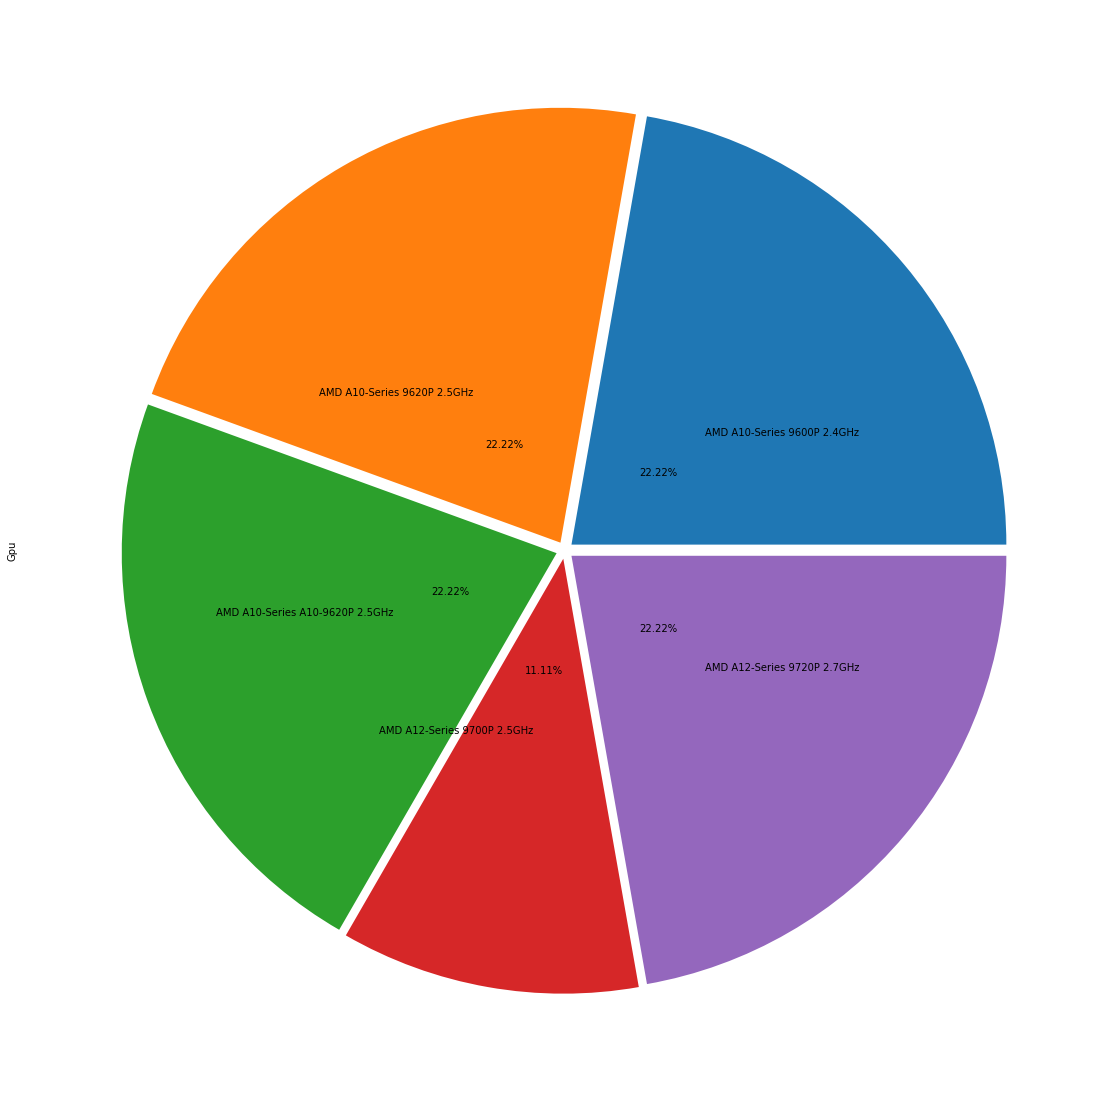

In [271]:
plt.figure(figsize=(20,20))
lap_price.groupby(['Cpu'])['Gpu'].size()[:5].plot(
    kind='pie', explode=[0.02,0.02,0.02,0.02,0.02] ,autopct='%.2f%%', pctdistance=0.26, labeldistance=0.4, textprops={
        'color':'black'
    }
)

        Observation: CPU/GPU is relatively equal per laptop

                    we can continue to find more insights, but let's go to machine learning

==

                                                Machine learning

In [273]:
lap_price.sample(n=2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
654,654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,19441.872
1261,1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.120


In [382]:
lap_price.drop(
    columns=['Unnamed: 0'], inplace=True
)

In [383]:
lap_price.sample(n=2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
900,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7Y75 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,107257.968
1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,61218.720


In [384]:
# encoding

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [385]:
lap_price['Company'] = labelencoder.fit_transform(lap_price['Company'])

In [386]:
lap_price['TypeName'] = labelencoder.fit_transform(lap_price['TypeName'])
lap_price['Memory'] = labelencoder.fit_transform(lap_price['Memory'])
lap_price['Gpu'] = labelencoder.fit_transform(lap_price['Gpu'])
lap_price['OpSys'] = labelencoder.fit_transform(lap_price['OpSys'])

In [387]:
# split weight and convert to numeric

lap_price['Weight'] = lap_price['Weight'].str.split('kg').str[0]

In [391]:
lap_price['Weight'] = pd.to_numeric(lap_price['Weight'], errors='coerce')

In [390]:
# split Ram and convert to numeric

lap_price['Ram'] = lap_price['Ram'].str.split('GB').str[0]

In [392]:
lap_price['Ram'] = pd.to_numeric(lap_price['Ram'], errors='coerce')

In [393]:
lap_price.sample(n=2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1268,7,2,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,23,41,5,1.17,11135.520
780,4,1,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,13,81,5,4.42,191211.264


In [394]:
lap_price['ScreenResolution'] = labelencoder.fit_transform(lap_price['ScreenResolution'])

In [395]:
lap_price['Cpu'] = labelencoder.fit_transform(lap_price['Cpu'])

In [396]:
lap_price.sample(n=2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
181,4,4,13.3,8,83,8,16,61,5,1.23,74538.720
483,3,3,15.6,8,30,4,35,40,5,1.89,13261.392


In [397]:
X = lap_price.iloc[:,:-1]

In [398]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,4,13.3,23,65,8,4,58,8,1.37
1,1,4,13.3,1,63,8,2,51,8,1.34
2,7,3,15.6,8,74,8,16,53,4,1.86
3,1,4,15.4,25,85,16,29,9,8,1.83
4,1,4,13.3,23,67,8,16,59,8,1.37


In [399]:
y = lap_price.iloc[:,-1]

In [400]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

[0.0385484  0.07610732 0.04087756 0.06169598 0.16672449 0.35977792
 0.04466615 0.0710363  0.02778484 0.11278104]


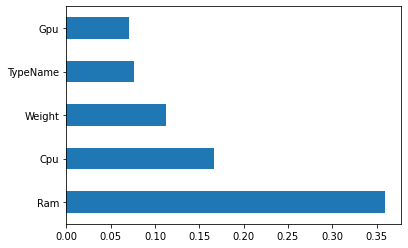

In [401]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

# plot the graph of feature importances for better visualizations

f_importance = pd.Series(model.feature_importances_, index=X.columns)
f_importance.nlargest(5).plot(kind='barh') # if there are many features pick the top 5
plt.show()

        Observation: Ram is the most important feature 

In [402]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.28)

In [403]:
X_train.shape

(938, 10)

In [404]:
X_test.shape

(365, 10)

In [412]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

rand_reg = RandomForestRegressor()
Ada_reg = AdaBoostRegressor(
    rand_reg,
)
Ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [413]:
y_pred = Ada_reg.predict(X_test)

In [414]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7752196055420131

                    87.4% accurate

In [415]:
import pickle

pickle_out = open('regressor.pkl', mode='wb')
pickle.dump(Ada_reg, pickle_out)
pickle_out.close()